In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from scipy.signal import correlate
from scipy.signal import get_window
from sdas.tests.LoadSdasData import LoadSdasData
from sdas.tests.StartSdas import StartSdas
from scipy.interpolate import InterpolatedUnivariateSpline

from scipy.optimize import curve_fit

In [3]:
# Load and select data
shot = 35061
client = StartSdas()

iter=[2,3,4,5,6,7,8,9,10,12]  
V_data2, time = LoadSdasData(
    client, 'PCIE_ATCA_ADC_16.BOARD_2.CHANNEL_002', shot)
V_data3, time = LoadSdasData(
    client, 'PCIE_ATCA_ADC_16.BOARD_2.CHANNEL_003', shot)
V_data4, time = LoadSdasData(
    client, 'PCIE_ATCA_ADC_16.BOARD_2.CHANNEL_004', shot)
V_data5, time = LoadSdasData(
    client, 'PCIE_ATCA_ADC_16.BOARD_2.CHANNEL_005', shot)
V_data6, time = LoadSdasData(
    client, 'PCIE_ATCA_ADC_16.BOARD_2.CHANNEL_006', shot)
V_data7, time = LoadSdasData(
    client, 'PCIE_ATCA_ADC_16.BOARD_2.CHANNEL_007', shot)
V_data8, time = LoadSdasData(
    client, 'PCIE_ATCA_ADC_16.BOARD_2.CHANNEL_008', shot)
V_data9, time = LoadSdasData(
    client, 'PCIE_ATCA_ADC_16.BOARD_2.CHANNEL_009', shot)
V_data10, time = LoadSdasData(
    client, 'PCIE_ATCA_ADC_16.BOARD_2.CHANNEL_010', shot)
V_data12, time = LoadSdasData(
    client, 'PCIE_ATCA_ADC_16.BOARD_2.CHANNEL_012', shot)
V_data=[V_data2,V_data3,V_data4,V_data5,V_data6,V_data7,V_data8,V_data9,V_data10,V_data12]

bool_indices = (time >26000) & (time < 29000)

for i in range(0,len(V_data)):
    V_data[i]=V_data[i][bool_indices]
time = time[bool_indices]

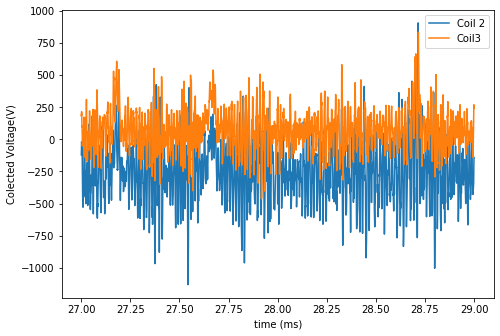

In [5]:
#Draw data
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(time/1000 , V_data[0],label='Coil 2')
ax.set_xlabel('time (ms)')
ax.set_ylabel('Colected Voltage(V)')
ax.plot(time/1000 , V_data[1],label='Coil3')
#ax.set_xlim(27.5,28)
ax.legend()
fig.savefig('Vcoils23.png',bbox_inches='tight',pad_inches=0.1)

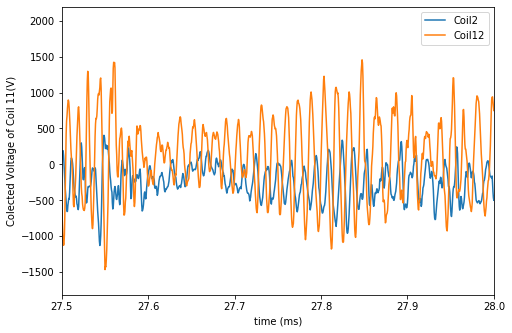

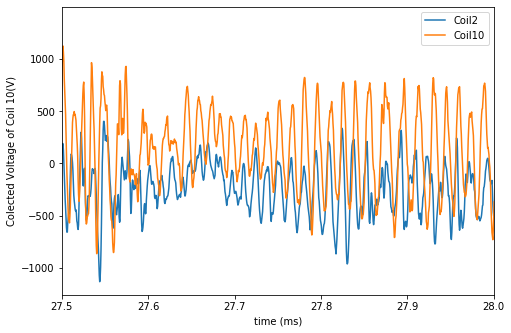

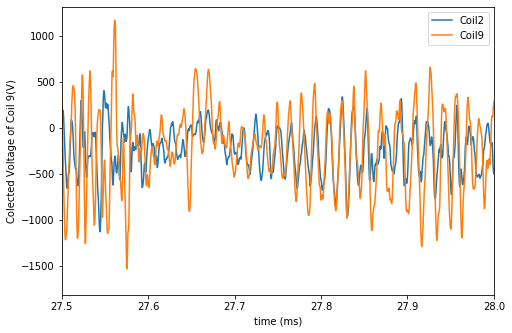

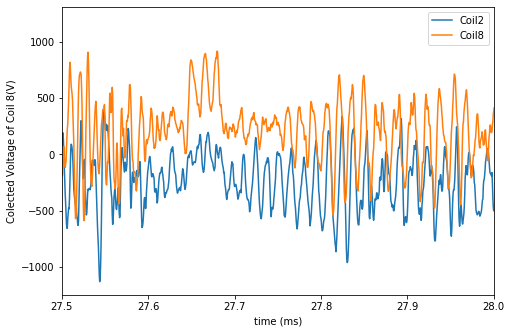

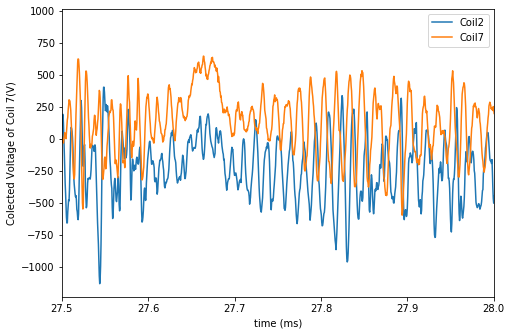

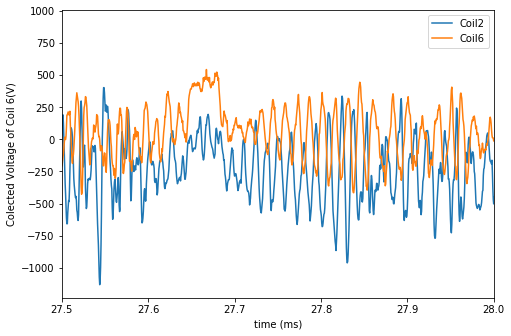

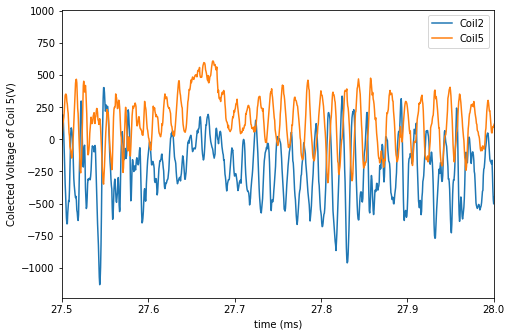

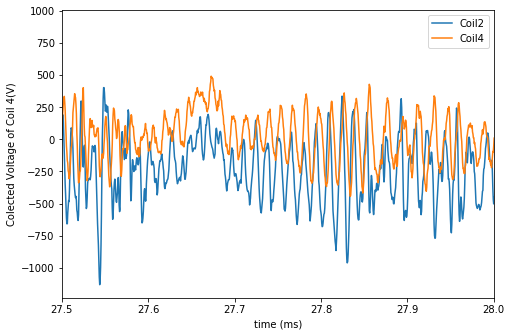

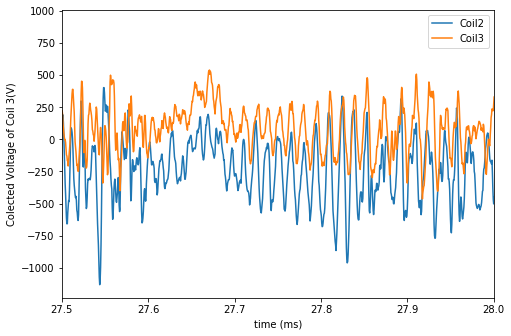

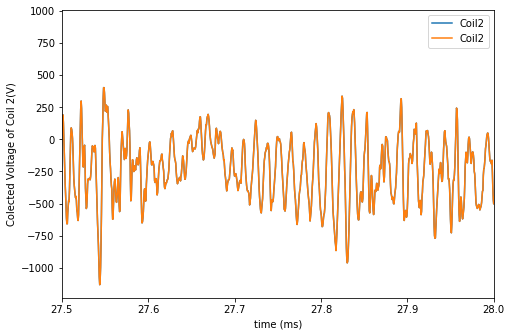

In [6]:
#Draw data
for i in range(9,-1,-1):
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.plot(time/1000 ,V_data[0],label='Coil2')
    ax.plot(time/1000 ,V_data[i],label='Coil'+str(iter[i]))
    ax.set_xlabel('time (ms)')
    ax.set_ylabel('Colected Voltage of '+'Coil '+str(i+2)+'(V)')
    ax.set_xlim(27.5,28)
    ax.legend()
    fig.savefig('Vcoil'+str(i+2)+'.png',bbox_inches='tight',pad_inches=0.1)

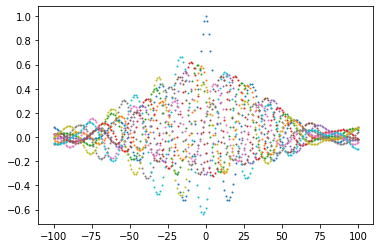

In [4]:
maxi=np.zeros(10)
mini=np.zeros(10)
var=np.zeros(10)
mean=np.zeros(10)
for i in range(0,len(V_data)):
    maxi[i]=np.max(V_data[i])
    mini[i]=np.min(V_data[i])
    mean[i]=np.mean(V_data[i])
    var[i]=np.std(V_data[i])
    
V_datacorr=np.zeros((10,len(V_data[0])))

for i in range(0,len(V_data)):
    V_datacorr[i]=[(V_data[i][j]-mean[i]) for j in range(0,len(V_data[i]))]

lag=np.zeros((10,201))
c=np.zeros((10,201))

for i in range(0,len(V_data)):
    lag[i],c[i],line,b=plt.xcorr(V_datacorr[0],V_datacorr[i],normed=True,maxlags=100 ,usevlines=False,markersize=1)

TypeError: unsupported operand type(s) for /: 'list' and 'int'

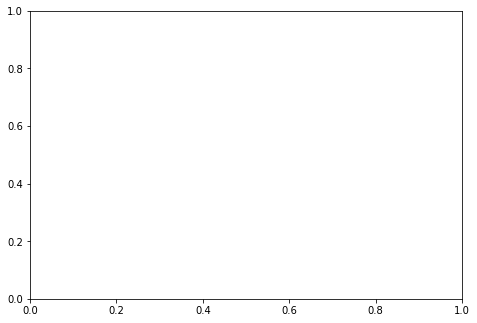

In [64]:
#Draw data
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
for i in range(0,10):
    ax.plot(time/1000 ,V_datacorr[i] ,label='Coil'+str(iter[i]))
ax.set_xlabel('time (ms)')
ax.set_ylabel('Colected Voltage(V)')
ax.set_xlim(27.5,28)
ax.legend()
fig.savefig('Vallcoils.png',bbox_inches='tight',pad_inches=0.1)

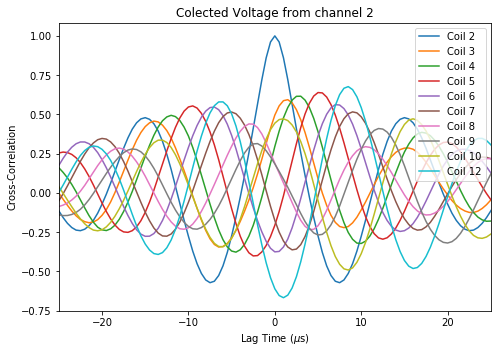

In [61]:
#Draw data

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
for i in range(0,10):
    ax.plot(-lag[i]*0.5 ,c[i],label='Coil '+str(iter[i]))

ax.set_xlabel('Lag Time ($\mu$s)')
ax.set_ylabel('Cross-Correlation')
ax.set_title('Colected Voltage from channel 2')
ax.set_xlim(-25,25)
ax.legend()
fig.savefig('Correlationall.png',bbox_inches='tight',pad_inches=0.1)

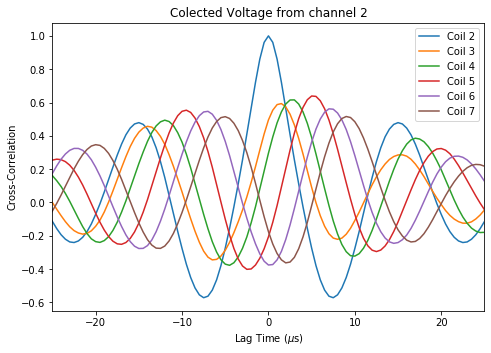

In [11]:
#Draw data

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
for i in range(0,6):
    ax.plot(-lag[i]*0.5 ,c[i],label='Coil '+str(i+2))

ax.set_xlabel('Lag Time ($\mu$s)')
ax.set_ylabel('Cross-Correlation')
ax.set_title('Colected Voltage from channel 2')
ax.set_xlim(-25,25)
ax.legend()
fig.savefig('Correlation6.png',bbox_inches='tight',pad_inches=0.1)

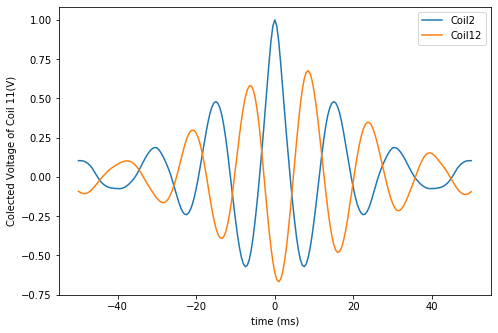

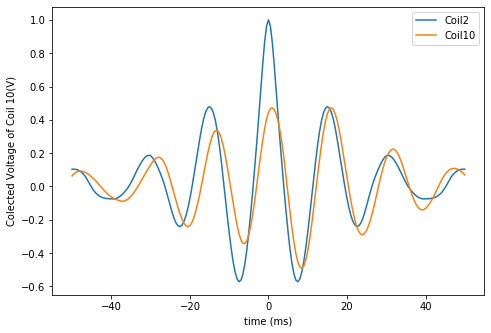

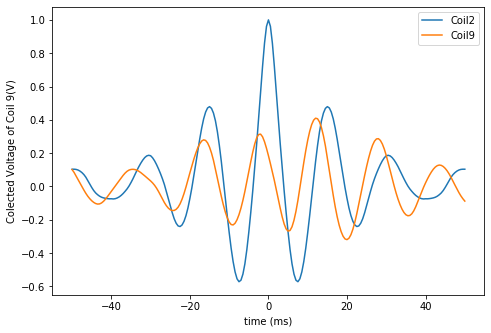

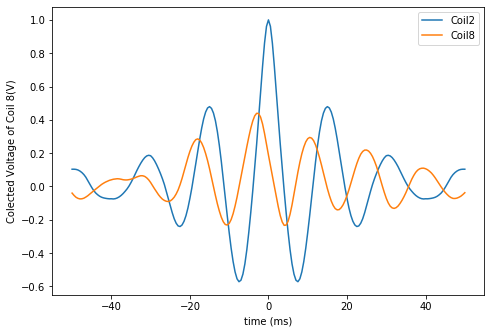

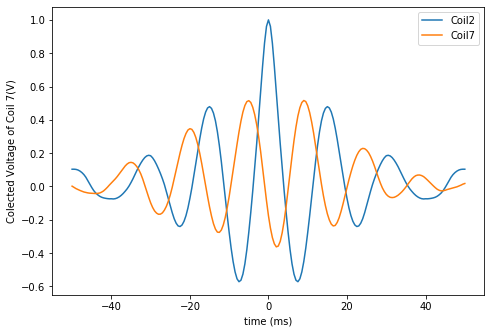

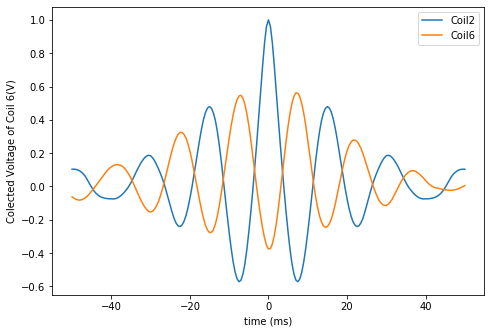

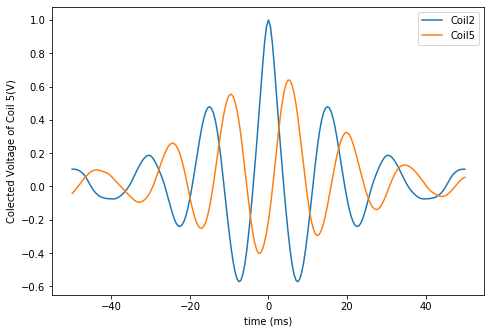

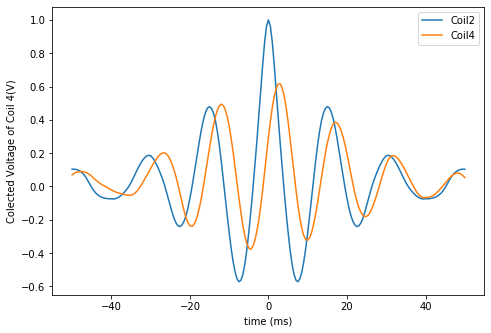

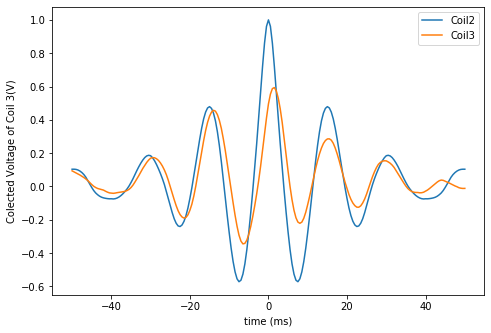

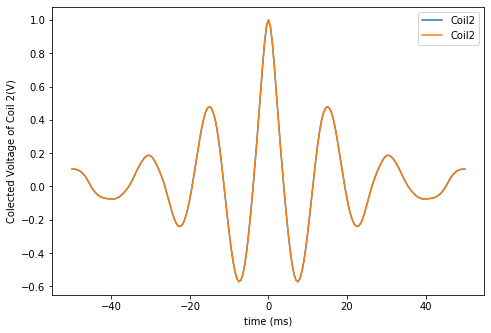

In [12]:
for i in range(9,-1,-1):
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.plot(-lag[0]*0.5,c[0],label='Coil2')
    ax.plot(-lag[i]*0.5 ,c[i],label='Coil'+str(iter[i]))
    ax.set_xlabel('time (ms)')
    ax.set_ylabel('Colected Voltage of '+'Coil '+str(i+2)+'(V)')
    ax.legend()
    fig.savefig('corr'+str(i+2)+'.png',bbox_inches='tight',pad_inches=0.1)

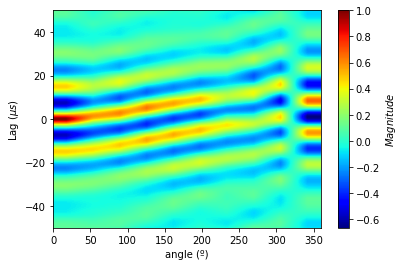

In [82]:
#draw in two dim

angle=[0,30,60,90,120,150,180,210,240,270,300,315,345,360]
aux=[(c[9][i]+c[8][i])/2 for i in range(0,len(c[9]))]
aux2=[(3*c[9][i]+c[0][i])/4 for i in range(0,len(c[9]))]
aux3=[(c[9][i]+3*c[0][i])/4 for i in range(0,len(c[9]))]
countor=[c[0],c[1],c[2],c[3],c[4],c[5],c[6],c[7],c[8],aux,c[9],aux2,aux3,c[0]]

fig = plt.figure()
plt.imshow(np.transpose(c), cmap= 'jet',extent=(np.min(angle),np.max(angle),np.min(lag[0]*0.5),np.max(lag[0]*0.5)),aspect='auto',interpolation='bilinear',norm=Normalize())
plt.colorbar().set_label('$Magnitude$')
#plt.ylim(-30,30)
plt.xlabel('angle (º)')
plt.ylabel('Lag ($\mu s$)')
fig.savefig('Correlation3d.png',bbox_inches='tight',pad_inches=0.1)


[6.25155172e-08 1.36937643e+00 2.77487169e+00 5.21832957e+00
 7.20682905e+00 9.10267692e+00 1.05607041e+01 1.21400192e+01
 1.59876958e+01 8.43327967e+00]
[     0.         382362.92348745 377385.93593354 301015.16299613
 290612.56888323 287607.03038904 297479.46949795 301909.85325139
 262000.86945025      0.        ]


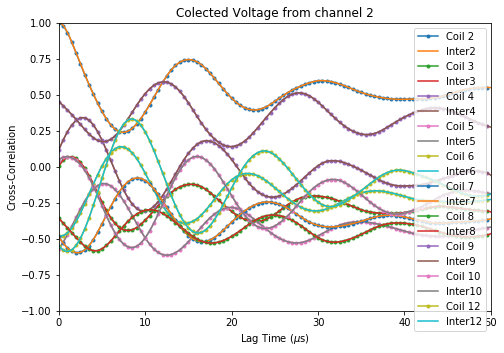

In [58]:
# get time lag at maximum
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

lagformax=np.zeros(10)
deltat=np.zeros(10)
velocity=np.zeros(10)
degree=[0,30,60,90,120,150,180,210,240,300]
caux=[[c[i][j]  for j in range (110,0,-1)] for i in range(0,10)]
laux=[[-lag[i][j]*0.5 for j in range (110,0,-1)] for i in range(0,10)]
for i in range(0,10):
    f=InterpolatedUnivariateSpline(laux[i],caux[i],k=4)
    cr_pts = f.derivative().roots()
    x=np.linspace(0,60,10000)
    y=[f(x[i]) for i in range(0,10000)]
    ax.plot(laux[i] ,caux[i],label='Coil '+str(iter[i]),marker='.')
    ax.plot(x,y,label='Inter'+str(iter[i]))
    cr_pts = np.append(cr_pts, (c[i][0], c[i][-1]))  # also check the endpoints of the interval
    for ii in range(0,len(cr_pts)):
        if cr_pts[ii]<0:
            cr_pts[ii]=0
    cr_vals = f(cr_pts)
    aux = np.argmax(cr_vals)
    lagformax[i]=cr_pts[aux]
ax.set_xlim(0,50)
ax.set_ylim(-1,1)
ax.set_xlabel('Lag Time ($\mu$s)')
ax.set_ylabel('Cross-Correlation')
ax.set_title('Colected Voltage from channel 2')
ax.legend(loc=1)    
fig.savefig('Interpolation.png',bbox_inches='tight',pad_inches=0.1)
for i in range(0,9):   
    deltat[i]=lagformax[i+1]-lagformax[i]
    velocity[i]=degree[i]*np.pi/180/lagformax[i]*1e6
print(lagformax)  
print(velocity)

In [21]:
# get time lag at maximum
degree=[0,30,60,90,120,150,180,210,240,300]
max=np.zeros((10,10,2))
caux=[[c[i][j]  for j in range (110,0,-1)] for i in range(0,10)]
laux=[[-lag[i][j]*0.5 for j in range (110,0,-1)] for i in range(0,10)]
for i in range(0,10):
    f=InterpolatedUnivariateSpline(laux[i],caux[i],k=4)
    cr_pts = f.derivative().roots()
    cr_values=f(cr_pts)
    for j in range(0,len(cr_pts)):
        max[i][j]=[cr_pts[j],cr_values[j]]
print(max)  

[[[ 5.66906171e-08  1.00000000e+00]
  [ 7.41681890e+00 -5.71922719e-01]
  [ 1.50326309e+01  4.79298423e-01]
  [ 2.26150433e+01 -2.40699662e-01]
  [ 3.03973592e+01  1.87349665e-01]
  [ 3.94612856e+01 -7.48138594e-02]
  [ 4.00926106e+01 -7.36428993e-02]
  [ 4.04896441e+01 -7.39552868e-02]
  [ 0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00]]

 [[ 1.36378709e+00  5.94694487e-01]
  [ 8.00184365e+00 -2.21021413e-01]
  [ 1.52916818e+01  2.86795032e-01]
  [ 2.27627541e+01 -1.25405400e-01]
  [ 2.97428276e+01  1.54623970e-01]
  [ 3.75526187e+01 -3.58371386e-02]
  [ 3.77927701e+01 -3.57629174e-02]
  [ 3.86423096e+01 -3.81109150e-02]
  [ 4.40812617e+01  3.85979545e-02]
  [ 0.00000000e+00  0.00000000e+00]]

 [[-4.61017357e+00 -3.77602868e-01]
  [ 2.76764317e+00  6.18672105e-01]
  [ 9.79744406e+00 -3.23172326e-01]
  [ 1.70661248e+01  3.86046863e-01]
  [ 2.46734535e+01 -1.80989908e-01]
  [ 3.17697566e+01  1.85741211e-01]
  [ 3.96493451e+01 -6.75421117e-02]
  [ 4.81330654e+01  8.19

In [100]:
deltatmean=np.mean([1.5494882,1.4196167,2.2518218,1.96010443,1.94425923,1.60091232,1.71806855])
deltatsigma=np.std([1.5494882,1.4196167,2.2518218,1.96010443,1.94425923,1.60091232,1.71806855])
velocidade=30/(deltatmean*0.000001)
velocidadesigma=30*deltatsigma*0.000001/(deltatmean*0.000001*deltatmean*0.000001)
velocidaderad=30*np.pi/(180*deltatmean*0.000001)
velocidaderadsigma=30*np.pi*deltatsigma*0.000001/(180*deltatmean*0.000001*deltatmean*0.000001)
print(deltatmean)
print(deltatsigma)
print(velocidade)
print(velocidadesigma)
print(velocidaderad)
print(velocidaderadsigma)

1.777753032857143
0.26750671119930675
16875234.88669573
2539294.5486925445
294528.4108202527
44319.05055262837


array([253.99446106, 162.75292969, 164.84005737, 174.45608521,
       177.27323914, 207.81829834, 256.84854126, 446.00479126,
       374.8973999 , 551.52728271])

In [41]:
v=[384,378,302,291,288,297,302]
print(np.mean(v))
print(np.std(v))

320.2857142857143
38.732468055013655


In [77]:
caux=[c[0][j] for j in range (150,50,-1)]
laux=[-lag[0][j]*0.5 for j in range (150,50,-1)]
#print(laux)
f=InterpolatedUnivariateSpline(laux,caux,k=4)
cr_pts = f.derivative().roots()
cr_val=f(cr_pts)
for i in range(0,len(cr_pts)):
    if(cr_val[i])<0:
        cr_val[i]=-cr_val[i]
delta=np.zeros(len(cr_pts)-1)
for i in range(0,len(cr_pts)-1):
    delta[i]=cr_pts[i+1]-cr_pts[i]
print(cr_pts)
print(cr_val)
print(delta)

[-2.26149760e+01 -1.50326309e+01 -7.41681890e+00  6.10622664e-16
  7.41681890e+00  1.50326309e+01  2.26144111e+01]
[0.24069928 0.47929842 0.57192272 1.         0.57192272 0.47929842
 0.24069607]
[7.5823451  7.61581205 7.4168189  7.4168189  7.61581205 7.58178015]


In [80]:
print(1/np.mean(delta)*1e6*0.5)
print(np.std(delta)*1e6/(np.mean(delta)*np.mean(delta))*0.5)

66328.55737359106
765.0708560390868


[10.1592608  15.37620004]
[[30.59845839 -2.87193377]
 [-2.87193377  0.40203141]]


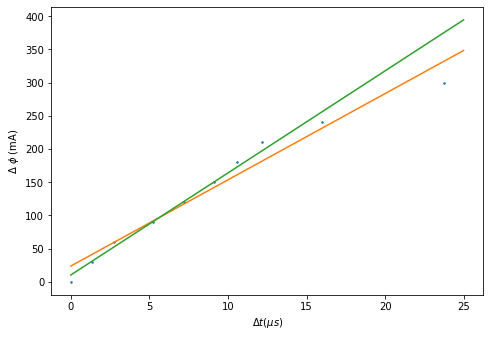

In [77]:
angle1=[0.,30.,60.,90.,120.,150.,180.,210.,240.,300.]
time1=[0,1.364,2.768,5.203,7.196,9.087,10.563,12.139,15.972,23.762]

angle2=[0.,30.,60.,90.,120.,150.,180.,210.,240.]
time2=[0,1.364,2.768,5.203,7.196,9.087,10.563,12.139,15.972]

def func(x,a,b):
    return a + b * x

parameters1, covariance1 = curve_fit(func, time1, angle1)
parameters2, covariance2 = curve_fit(func, time2, angle2)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(time1, angle1, '.', label='data', markersize=3)
time2=np.arange(0,25,0.01)
ax.plot(time2, func(time2, parameters1[0],parameters1[1]), label='fit1')
ax.plot(time2, func(time2, parameters2[0],parameters2[1]), label='fit2')
ax.set_xlabel('$\Delta t(\mu s)$')
ax.set_ylabel('$\Delta$ $\phi$ (mA)')
fig.savefig('fit.png',bbox_inches='tight',pad_inches=0.1)

print(parameters)
print(covariance)